In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-04-29 15:09:00--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-04-29 15:09:00 (17.2 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [19]:
# Load the data
data = pd.read_csv("moore.csv", header=None).values
X = data[:, 0].reshape(-1, 1) # make it a 2D array of size N x D where D = 1 (right now it's (N,))
# print(X)
Y = data[:, 1]

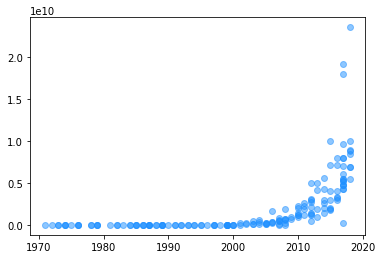

In [20]:
# Plot the data
plt.scatter(X, Y, color="dodgerblue", alpha=0.5)


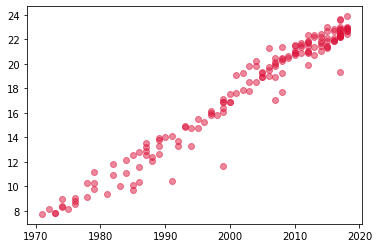

In [21]:
# Take the log and plot since we want a linear model
Y = np.log(Y)
plt.scatter(X, Y, color="crimson", alpha=0.5)

In [22]:
# Center the X data so the values are not too large
X = X - X.mean()

In [23]:
# Create a TF model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

# learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 530us/step - loss: 700.8771
Epoch 2/200
6/6 [==============================] - 0s 586us/step - loss: 729.9498
Epoch 3/200
6/6 [==============================] - 0s 636us/step - loss: 626.5621
Epoch 4/200
6/6 [==============================] - 0s 567us/step - loss: 422.5982
Epoch 5/200
6/6 [==============================] - 0s 584us/step - loss: 240.1176
Epoch 6/200
6/6 [==============================] - 0s 911us/step - loss: 177.2835
Epoch 7/200
6/6 [==============================] - 0s 612us/step - loss: 187.3074
Epoch 8/200
6/6 [==============================] - 0s 977us/step - loss: 209.0625
Epoch 9/200
6/6 [==============================] - 0s 605us/step - loss: 120.7400
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 131.0907
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 147.1075
Epoch 12/200
6/6 [==============================] - 0s 877us/step - loss: 64.3870
Epoch 13/200
6/6 [

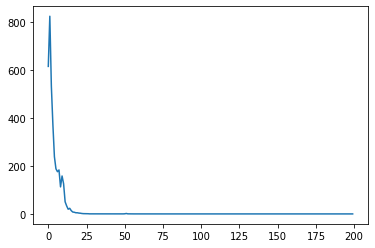

In [24]:
# Plot the loss
plt.plot(r.history["loss"], label="loss")

In [25]:
# Get the slope of the line
# The slope of the lineis related to the doubling rate of transistor count
print(model.layers) # Note: there is only one layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34213686]], dtype=float32), array([17.763718], dtype=float32)]


In [28]:
# Now the slope of the line
a = model.layers[0].get_weights()[0][0, 0]
print(a)

0.34213686


Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [29]:
print("Time to double: ", np.log(2)/a)

Time to double:  2.025935413024782


In [36]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)

denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a, b)
print("Time to double: ", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204


### Making Predictions

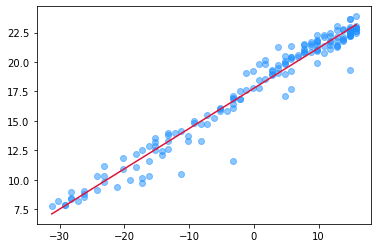

In [37]:
# Make sure the line fits the data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y, color="dodgerblue", alpha=0.5)
plt.plot(X, Yhat, color="crimson")

In [50]:
# Manual calculation

# Get weights
w, b = model.layers[0].get_weights()

# reshape because we flattened earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) ---> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

print(min(Yhat))
print(min(Yhat2))

# print(Yhat == Yhat2) # doesn't work here because they are floats
np.allclose(Yhat, Yhat2)

7.0898924
7.089892405050795


True